In [1]:
                                                                                                                                                                                                                            import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D
from pathlib import Path
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense







In [2]:
(X_train,y_train),(X_test, y_test)=cifar10.load_data()


In [3]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

In [4]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [5]:
from keras.layers import Input, Conv2D, Dense
from keras.models import Model

input_layer = Input(shape=(32, 33, 34))
conv_layer = Conv2D(32, (3, 3), padding='same', activation='relu')(input_layer)

# Create the rest of your model using the functional API
# For example:
# x = SomeLayerType()(conv_layer)
# ...

output_layer = Dense(units=10, activation='softmax')(conv_layer)  # Replace with the actual output layer type and parameters

model = Model(inputs=input_layer, outputs=output_layer)

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

C:\Users\dipik\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642,570 (2.45 MB)

 Trainable params: 642,570 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_test, y_test),
    shuffle=True)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.3458 - loss: 1.7679 - val_accuracy: 0.5689 - val_loss: 1.2063
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5541 - loss: 1.2355 - val_accuracy: 0.6335 - val_loss: 1.0313
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6217 - loss: 1.0770 - val_accuracy: 0.6805 - val_loss: 0.9140
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6530 - loss: 0.9782 - val_accuracy: 0.7083 - val_loss: 0.8405
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6814 - loss: 0.9012 - val_accuracy: 0.7102 - val_loss: 0.8446
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7004 - loss: 0.8511 - val_accuracy: 0.7146 - val_loss: 0.8168
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7111 - loss: 0.8169 - val_accuracy: 0.7371 - val_loss: 0.7686
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7259 -

In [9]:
model_structure=model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

8230

In [10]:
model.save_weights("model.weights.h5")

In [11]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [12]:
class_labels=[
    "Planes",
    "car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [13]:
f=Path("model_structure.json")
model_structure=f.read_text()


In [14]:
from keras.models import model_from_json

model = model_from_json(model_structure)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate some dummy data
X_train = np.random.random((1000, 100))
y_train = np.random.randint(10, size=(1000, 10))

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Save the weights to a file with the correct filename
model.save_weights('model.weights.h5')

# Load the weights from the file
model.load_weights('model.weights.h5')

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0799 - loss: 116.1879   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0761 - loss: 168.7176 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0742 - loss: 246.3381 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0753 - loss: 332.6362 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0864 - loss: 427.9320 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0781 - loss: 524.7989 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0833 - loss: 629.9478 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0849 - loss: 722.9387
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0753 - loss: 820.2469 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0667 - loss: 912.2436 


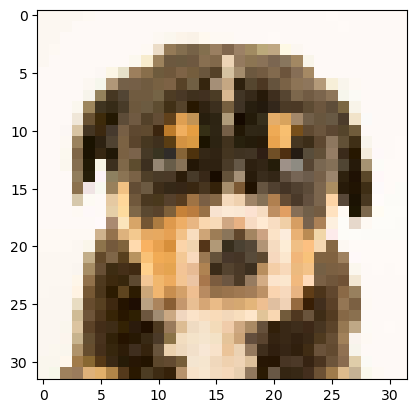

In [34]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# Use a raw string to interpret backslashes as literal characters
img_path = r"C:\Users\dipik\anaconda3\share\jupyter\labextensions\@anaconda\share_notebook\schemas\@anaconda\share_notebook\dog.png"

img = load_img(img_path, target_size=(32, 32))
plt.imshow(img)

In [36]:
from tensorflow.keras.utils import img_to_array
image_to_test=img_to_array(img)

In [38]:
list_of_images=np.expand_dims(image_to_test,axis=0)

In [48]:
import numpy as np

# Assuming the image is a numpy array of shape (32, 32, 3)
image = np.array(list_of_images[0])

# Check the initial shape of the image
print("Original image shape:", image.shape)

# Flatten the image
image_flattened = image.reshape(1, -1)  # Flatten to shape (1, 3072)
print("Flattened image shape:", image_flattened.shape)

# Make sure it matches the Dense layer's expected input shape
if image_flattened.shape[1] != 100:
    # Assuming you need to reshape to (1, 100)
    # For example, if your model requires input of shape (1, 100), but the image is (1, 3072)
    # This means you should reshape your image data differently or check your model design.
    print("Image needs to be reshaped or model needs to be adjusted.")
else:
    # Make the prediction if the shape matches
    results = model.predict(image_flattened)
    print("Prediction results:", results)


Original image shape: (3072,)
Flattened image shape: (1, 3072)
Image needs to be reshaped or model needs to be adjusted.


In [52]:
# Define the results list
results = [1, 2, 3, 4, 5]

# Access the first element of the list
single_result = results[0]

print(single_result)  # Output will be 1


1


In [56]:
import numpy as np

# Example list of arrays
results = [np.array([0.1, 0.4, 0.5]), np.array([0.2, 0.3, 0.5])]

# Access the first result
single_result = results[0]

# Find the most likely class index
most_likely_class_index = int(np.argmax(single_result))

# Directly get the likelihood value using argmax
class_likelihood = np.max(single_result)

print(f"Most likely class index: {most_likely_class_index}")
print(f"Class likelihood: {class_likelihood}")


Most likely class index: 2
Class likelihood: 0.5


In [58]:
class_label=class_labels[most_likely_class_index]

In [60]:
print("This is a image is a {} likelihood: {:2f}".format(class_label, class_likelihood))

This is a image is a Bird likelihood: 0.500000
